# The Driven Pendulum

<font  face=Times color=darkblue size=3> We use the driven Pendulum as an example to introduce some methods to solve the differential equations.<br> <br>The equation of a driven, damped pendulum is: $x^{''}= -\frac{g}{l}\sin{x}-\gamma x^{'}+Q\sin(t\Omega)$
 <br><br> In special case, that $\gamma=0$,Q = 0, and x is small, this equation reduces to harmonic oscillator with k=mg/l:  $x^{''}=-\frac{k}{m}x$

## Different Methods

<font  face=Times color=darkblue size=3>  We show different methods to approximate the equation of 1D harmonic oscillator, while they are similar in essence.

### Euler Method

<font  face=Times color=darkblue size=3> After discretization: $t=t_n=n*\tau$ 
    <br>So, $$\vec x(n+1)=\vec x(n)+\tau\vec v(n)$$ $$\vec v(n+1)=\vec v(n)+\tau\vec a(n)$$
    $$E(n+1)=\frac{1}{2}kx^2+\frac{1}{2}mv^2=E(n)+\frac{1}{2}\tau^2kv(n)^2+\frac{1}{2}\tau^2\frac{k^2}{m}x(n)^2$$
    <br> For convenience, choose k=m=1, and set x(0)=1, v(0)=0

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# set initial conditions
t_Eu=[0]
v_Eu=[0]
x_Eu=[1]
E_Eu=[0.5]
tau=0.01
k=1;m=1

In [3]:
# Use the iteration scheme:
for i in range(1,3000):
    t_Eu.append(tau*i)
    x_Eu.append(x_Eu[i-1]+tau*v_Eu[i-1])
    E_Eu.append(E_Eu[i-1]+0.5*np.power(tau,2)*np.power(v_Eu[i-1],2)+0.5*np.power(tau,2)*np.power(x_Eu[i-1],2))
    v_Eu.append(v_Eu[i-1]+tau*(-k/m)*x_Eu[i-1])

### Velocity Verlet Method

<font  face=Times color=darkblue size=3> Use the centered 3-point formula, we get:$$\vec x(n+1)=2\vec x(n)-\vec x(n-1)+\tau^2\vec a(n)$$
    $$\vec v(n)=\frac{\vec x(n+1)-\vec x(n-1)}{2\tau},   \quad \vec{x}(-1)=\vec{x}(0)-\tau\vec v(0)+\frac{\tau^2}{2}\vec a(0)$$
    <br> which is Verlet Method.
    <br> Then, we can simply derive the Velocity Verlet Method from it :
    $$\vec x(n+1)=\vec x(n)+\tau\vec v(n)+\frac{1}{2}\tau^2\vec a(n)$$
    $$\vec v(n+1)=\vec v(n)+\frac{1}{2}\tau(\vec a(n)+\vec a(n+1))$$
    <br>which is self-starting and we are gonna show the code of.

In [4]:
#initial condition
t_vv=[0]
v_vv=[0]
x_vv=[1]
E_vv=[0.5]

In [5]:
for i in range(1,3000):
    t_vv.append(tau*i)
    x_vv.append(x_vv[i-1]+tau*v_vv[i-1]+0.5*np.power(tau,2)*(-k/m)*x_vv[i-1])
    v_vv.append(v_vv[i-1]+0.5*tau*(-k/m)*(x_vv[i-1]+x_vv[i]))
    E_vv.append(0.5*k*np.power(x_vv[i],2)+0.5*m*np.power(v_vv[i],2))

### Runge-Kutta Methods

<font  face=Times color=darkblue size=3>
    A general procedure to obtain higher order Runge-Kutta method is:
 $$x(t+\tau)=x(t)+\sum_{i=1}^{p}w_ik_i$$ <br> with $k_1=\tau f(x(t),t), \qquad k_i=\tau f\lgroup x(t)+\sum_{j<i}\alpha_{ij}k_j,t+\sum_{j<i}\alpha_{ij}\tau\rgroup,i\ge2$
<br><br>The most popular one is 4-th order Runge-Kutta method:
    \begin{equation}
    \begin{aligned}
    \\& k_1=\tau v(n)
    \\& l_1=\tau a(n)
    \\& k_2=\tau(v(n)+\frac{1}{2}l_1)
    \\& l_2=\tau a(x(n)+\frac{1}{2}k_1,v(n)+\frac{1}{2}l_1,t+\frac{1}{2}\tau)
    \\& k_3=\tau (v(n)+\frac{1}{2}l_2)
    \\& l_3=\tau a(x(n)+\frac{1}{2}k_2,v(n)+\frac{1}{2}l_2,t+\frac{1}{2}\tau)
    \\& k_4=\tau (v(n)+l_3)
    \\& l_4=\tau a(x(n)+k_3,v(n)+l_3,t+\tau)
    \end{aligned}
    \end{equation}
    $$x(n+1)=x(n)+\frac{1}{6}(k_1+2k_2+2k_3+k_4)$$
    $$v(n+1)=v(n)+\frac{1}{6}(l_1+2l_2+2l_3+l_4)$$

In [6]:
#initial condition
t_rk=[0]
v_rk=[0]
x_rk=[1]
E_rk=[0.5]

In [7]:
for i in range(1,3000):
    t_rk.append(tau*i)
    k1=tau*v_rk[i-1]
    l1=tau*(-k/m)*x_rk[i-1]
    k2=tau*(v_rk[i-1]+0.5*l1)
    l2=tau*(-k/m)*(x_rk[i-1]+0.5*k1)
    k3=tau*(v_rk[i-1]+0.5*l2)
    l3=tau*(-k/m)*(x_rk[i-1]+0.5*k2)
    k4=tau*(v_rk[i-1]+l3)
    l4=tau*(-k/m)*(x_rk[i-1]+k3)
    x_rk.append(x_rk[i-1]+(1/6)*(k1+2*k2+2*k3+k4))
    v_rk.append(v_rk[i-1]+(1/6)*(l1+2*l2+2*l3+l4))
    E_rk.append(0.5*k*np.power(x_rk[i],2)+0.5*m*np.power(v_rk[i],2))

### Comparison of The Methods

(-1.5, 2.0)

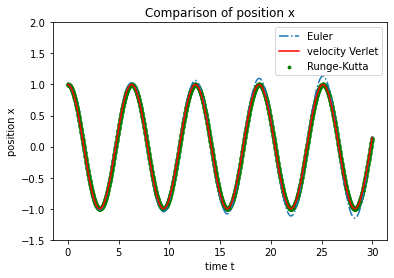

In [8]:
#postion x plot
plt.plot(t_Eu,x_Eu,'-.',label='Euler')
plt.plot(t_vv,x_vv,color='red',label='velocity Verlet')
plt.scatter(t_rk,x_rk,color='green',s=8,label='Runge-Kutta')
plt.legend()
plt.xlabel('time t')
plt.ylabel('position x')
plt.title('Comparison of position x')
plt.ylim(-1.5,2)

(0.499985, 0.500005)

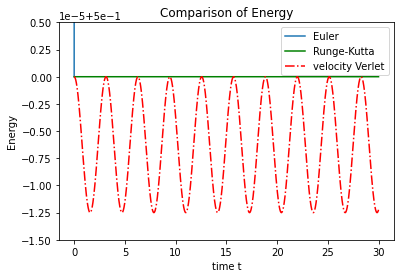

In [9]:
#energy plot
plt.plot(t_Eu,E_Eu,label='Euler')
plt.plot(t_rk,E_rk,color='green',label='Runge-Kutta')
plt.plot(t_vv,E_vv,'-.',color='red',label='velocity Verlet')
plt.legend()
plt.xlabel('time t')
plt.ylabel('Energy')
plt.title('Comparison of Energy')
plt.ylim(0.499985,0.500005)

<font  face=Times color=darkblue size=3> We can see the Runge-Kutta method for a periodic motion does note have a bounded error in contrast to Verlet methods, while Euler Method seems to be the worst.

## Motion of The Damped, Driven Pendulum

<font  face=Times color=darkblue size=3> Now, we use Runge-Kutta method to study the driven pendulum, $$x^{''}= -k\sin{x}-\gamma x^{'}+Q\sin(t\Omega)$$ 
    <br> We set Q=1 and $\gamma$=0.1 and must be careful as $x$ is a cyclic angular variable (did not care when there is no driving force), the restriction is $x\in [-\pi,\pi]$.

In [5]:
# Define a function with changing parameters for the driven case
def driven_pendulum(x_initial,v_initial,gamma_here,Q_here,omega_here,tau_here,time_steps):
    t_pen=[0]
    v_pen=[v_initial]
    x_pen=[x_initial]
    gamma=gamma_here
    Q=Q_here
    omega=omega_here
    tau=tau_here
    for i in range(1,time_steps):
        t_pen.append(tau*i)
        k1=tau*v_pen[i-1]
        l1=tau*(-k*np.sin(x_pen[i-1])-gamma*v_pen[i-1]+Q*np.sin(tau*i*omega))
        k2=tau*(v_pen[i-1]+0.5*l1)
        l2=tau*(-k*np.sin(x_pen[i-1]+0.5*k1)-gamma*(v_pen[i-1]+0.5*l1)+Q*np.sin(tau*(i+0.5)*omega))
        k3=tau*(v_pen[i-1]+0.5*l2)
        l3=tau*(-k*np.sin(x_pen[i-1]+0.5*k2)-gamma*(v_pen[i-1]+0.5*l2)+Q*np.sin(tau*(i+0.5)*omega))
        k4=tau*(v_pen[i-1]+l3)
        l4=tau*(-k*np.sin(x_pen[i-1]+k3)-gamma*(v_pen[i-1]+l3)+Q*np.sin(tau*(i+1)*omega))
        xnew=x_pen[i-1]+(1/6)*(k1+2*k2+2*k3+k4)
        if xnew>np.pi:
            xnew=xnew-2*np.pi
        if xnew<-np.pi:
            xnew=xnew+2*np.pi
        x_pen.append(xnew)
        v_pen.append(v_pen[i-1]+(1/6)*(l1+2*l2+2*l3+l4))
    return t_pen,v_pen,x_pen

In [8]:
t_list,v_list,x_list=driven_pendulum(x_initial=1,v_initial=0,gamma_here=0.1,Q_here=1,omega_here=2,tau_here=0.01,time_steps=20000)

Text(0, 0.5, 'x')

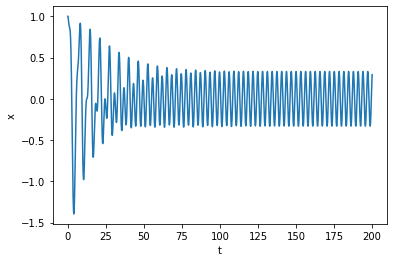

In [9]:
# plot the position x of the pendulum
plt.plot(t_list,x_list)
plt.xlabel('t')
plt.ylabel('x')

<font  face=Times color=darkblue size=3> We see that the pendulum after an initial damped, irregular motion takes on a periodic oscillation.
    <br><br>In phase space, as plotted below, the trajectory is seen to be eventually driven towards a cyclic attractor.

(-3.0, 3.0)

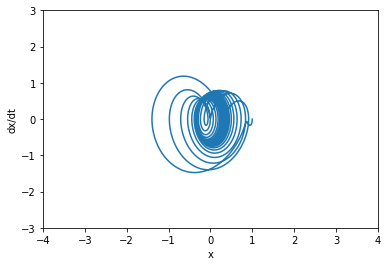

In [11]:
plt.plot(x_list,v_list)
plt.xlabel('x')
plt.ylabel('dx/dt')
plt.xlim(-4,4)
plt.ylim(-3,3)

<font  face=Times color=darkblue size=3> One can better better resolve the attractor by skipping the transient part when plotting. An example is when we set $\gamma=0.5$, $Q=1.06$, and $\Omega=2/3$ as shown below.

In [12]:
t_list,v_list,x_list=driven_pendulum(x_initial=1,v_initial=0,gamma_here=0.5,Q_here=1.06,omega_here=2/3,tau_here=0.01,time_steps=20000)

Text(0, 0.5, 'dx/dt')

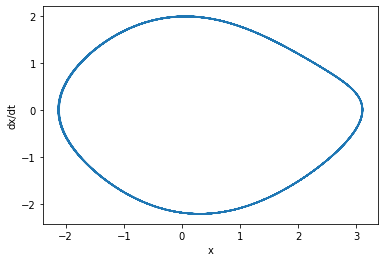

In [14]:
plt.plot(x_list[10000:],v_list[10000:]) # skipping time_steps=0-10000
plt.xlabel('x')
plt.ylabel('dx/dt')

<font  face=Times color=darkblue size=3> We see that the attractor is not symmetric under the reflection $(x,v)\rightarrow (-x,-v)$, which corresponds to a breaking of reflection symmetry.
   <br><br>
    If we further increase $Q$ to $1.07$, a period doubling occurs, as shown below.

In [27]:
t_list,v_list,x_list=driven_pendulum(x_initial=1,v_initial=0,gamma_here=0.5,Q_here=1.07,omega_here=2/3,tau_here=0.01,time_steps=50000)

Text(0, 0.5, 'dx/dt')

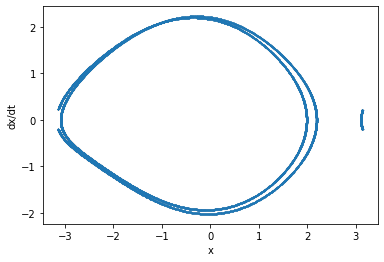

In [28]:
plt.scatter(x_list[30000:],v_list[30000:],s=0.2) 
plt.xlabel('x')
plt.ylabel('dx/dt')

<font  face=Times color=darkblue size=3> Further increasing $Q$ will result in more and more period doubing, until eventually a new behavior obtained.

In [46]:
t_list,v_list,x_list=driven_pendulum(x_initial=1,v_initial=0,gamma_here=0.5,Q_here=1.2,omega_here=2/3,tau_here=0.01,time_steps=100000)

Text(0, 0.5, 'dx/dt')

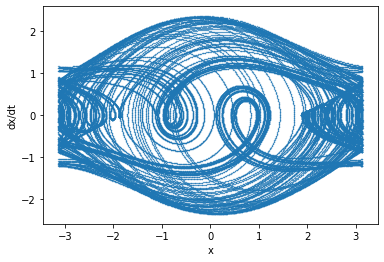

In [47]:
plt.scatter(x_list[10000:],v_list[10000:],s=0.1) 
plt.xlabel('x')
plt.ylabel('dx/dt')

<font  face=Times color=darkblue size=3> The figure above shows the phase space when $Q=1.2$. In this case, the motion never closes, and the attractor fills a finite region of the two-dimensional phase space. 

<font  face=Times color=darkblue size=3> To locate better the chaotic regime upon varing Q, we now construct a bifurcation diagram. For example, for any given Q, we record the velocity as the angle x passes the value 0 from above.

In [86]:
v_bif=[]
Q_bif=[]
time_steps=30000
for iq in range(200): #Q=0-1
    Q_here=0+iq*0.005
    t_list,v_list,x_list=driven_pendulum(x_initial=1,v_initial=0,gamma_here=0.5,
                                         Q_here=Q_here,omega_here=2/3,tau_here=0.01,time_steps=time_steps)
    for ib in range(1,time_steps):
        if -0.03<x_list[ib]<0 and 0.03>x_list[ib-1]>=0:
            v_bif.append(v_list[ib])
            Q_bif.append(Q_here)
    print(iq)
for iq in range(400): #Q=1-1.83
    Q_here=1+iq*0.002075
    t_list,v_list,x_list=driven_pendulum(x_initial=1,v_initial=0,gamma_here=0.5,
                                         Q_here=Q_here,omega_here=2/3,tau_here=0.01,time_steps=time_steps)
    for ib in range(1,time_steps):
        if -0.03<x_list[ib]<0 and 0.03>x_list[ib-1]>=0:
            v_bif.append(v_list[ib])
            Q_bif.append(Q_here)
    print(iq)
for iq in range(200):
    Q_here=1.83+iq*0.0002 #Q=1.83-1.87
    t_list,v_list,x_list=driven_pendulum(x_initial=1,v_initial=0,gamma_here=0.5,
                                         Q_here=Q_here,omega_here=2/3,tau_here=0.01,time_steps=time_steps)
    for ib in range(1,time_steps):
        if -0.03<x_list[ib]<0 and 0.03>x_list[ib-1]>=0:
            v_bif.append(v_list[ib])
            Q_bif.append(Q_here)
    print(iq)
for iq in range(100):
    Q_here=1.87+iq*0.0013 #Q=1.87-2
    t_list,v_list,x_list=driven_pendulum(x_initial=1,v_initial=0,gamma_here=0.5,
                                         Q_here=Q_here,omega_here=2/3,tau_here=0.01,time_steps=time_steps)
    for ib in range(1,time_steps):
        if -0.03<x_list[ib]<0 and 0.03>x_list[ib-1]>=0:
            v_bif.append(v_list[ib])
            Q_bif.append(Q_here)
    print(iq)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104


Text(0.5, 0, '$Q$')

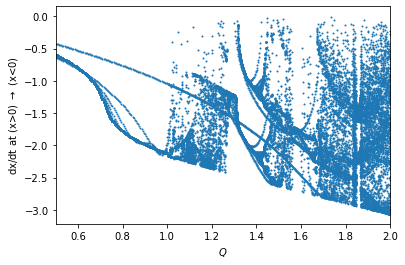

In [108]:
plt.scatter(Q_bif,v_bif,s=1)
plt.xlim(0.5,2)
plt.ylabel(r"dx/dt at (x>0) $\rightarrow$ (x<0)")
plt.xlabel(r"$Q$")
plt.title("Bifurcation diagram")

<font  face=Times color=darkblue size=3> The diagram also exhibits self-similarity, as shown below.

Text(0.5, 1.0, 'Self-similarity')

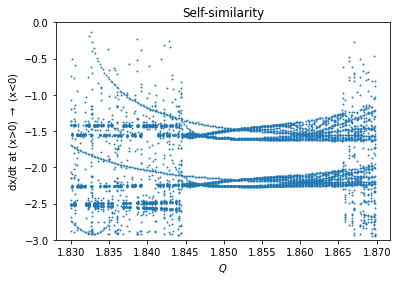

In [114]:
plt.scatter(Q_bif,v_bif,s=0.8)
#plt.xlim(1.845,1.87)
plt.ylim(-3,0)
plt.ylabel(r"dx/dt at (x>0) $\rightarrow$ (x<0)")
plt.xlabel(r"$Q$")
plt.title("Self-similarity")